<a href="https://colab.research.google.com/github/gelabgaboo/codecademy/blob/main/BioMed_Imaging_Program_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 a) Create separate plots of f and F (or the magnitude of F if complex-valued) using sufficient data points
(i.e., values of x) to show details. Appropriately label the x and y axes in each plot (including units!)
and set the axis scales to accurately show the location and size of your wavelet and the spectrum.

In [ ]:
import numpy as np
import math as m
from scipy import signal
from scipy.fft import fft, fftfreq, ifft, fftshift
from scipy.signal import convolve
import matplotlib.pyplot as plt

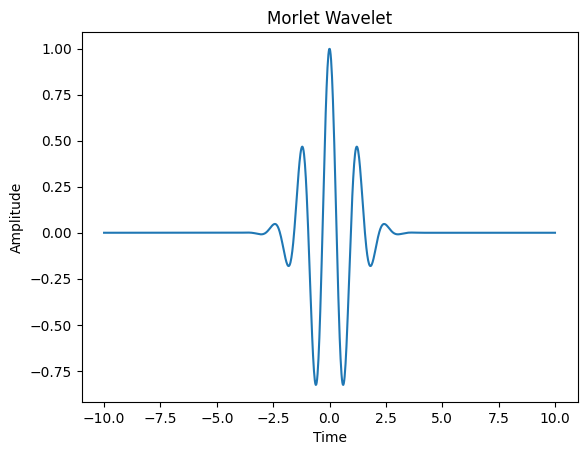

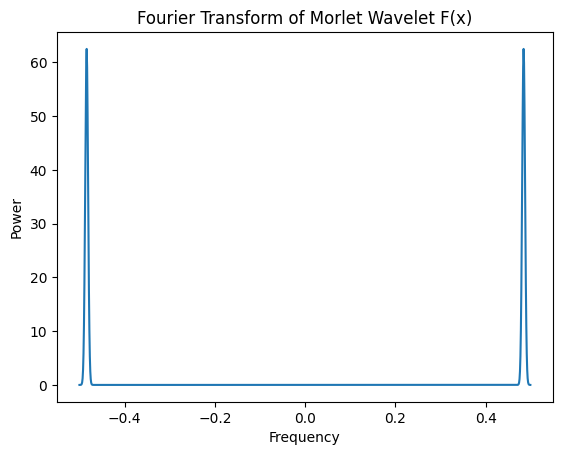

In [ ]:
# Use morlet wave as my simple wavelet function
t = np.linspace(-10,10,1000)
morlet = np.exp((-t**2)/2)*np.cos(5*t)

#Creating and plotting the morlet function
plt.plot(t,morlet)
plt.title('Morlet Wavelet')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Fourier transfomr of morlet function
Fmorlet = np.real(fft(morlet))

# plotting the transform of the morlet funciton
plt.plot(fftshift(fftfreq(len(t))),np.abs(Fmorlet))
plt.title('Fourier Transform of Morlet Wavelet F(x)')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

1 B) How well can fp be approximated with a finite number of series terms? Use a symmetric range
n ∈ [−N, N] so that the imaginary part of the Fourier series cancels out. Try different values of N.
For each value, create a plot comparing a few periods of your function fp(x) against the series result.
Be sure to use sufficient data points to show details, This is particularly important when N is large.
Comment on the output of the truncated Fourier series.

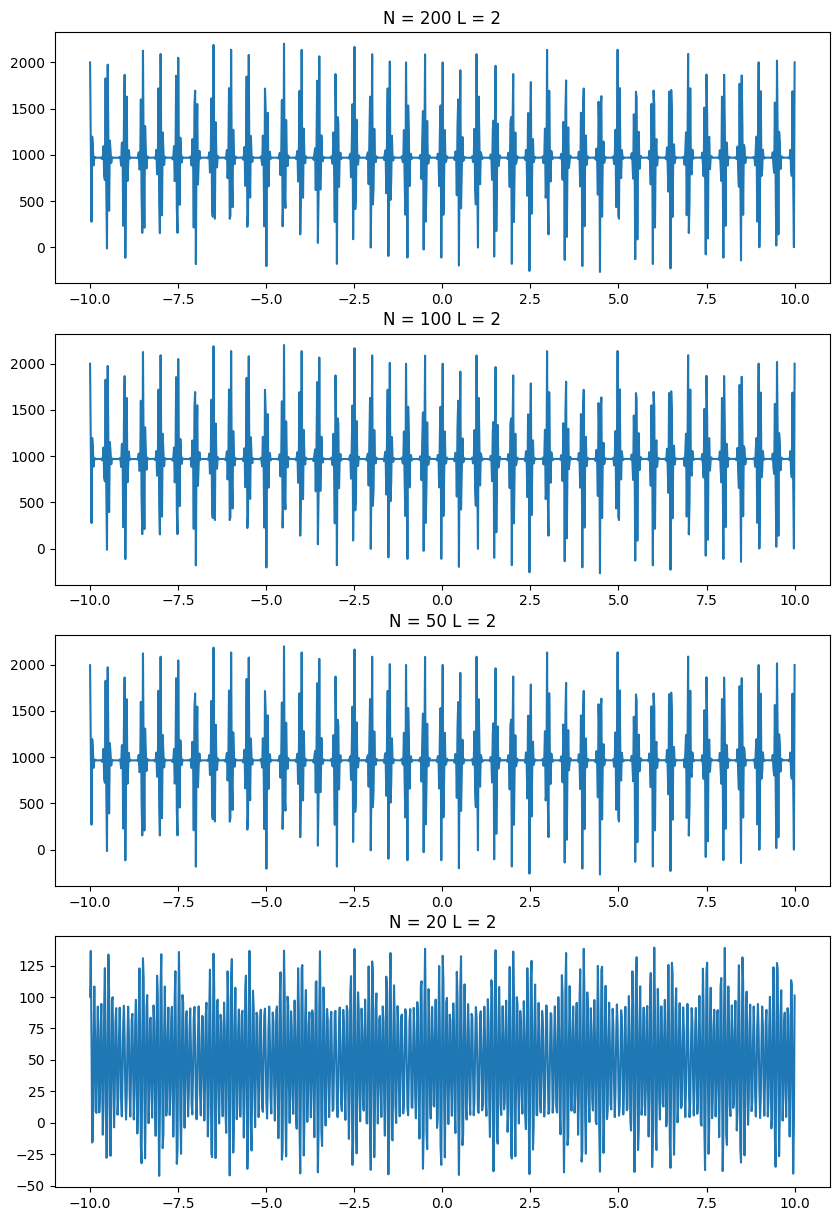

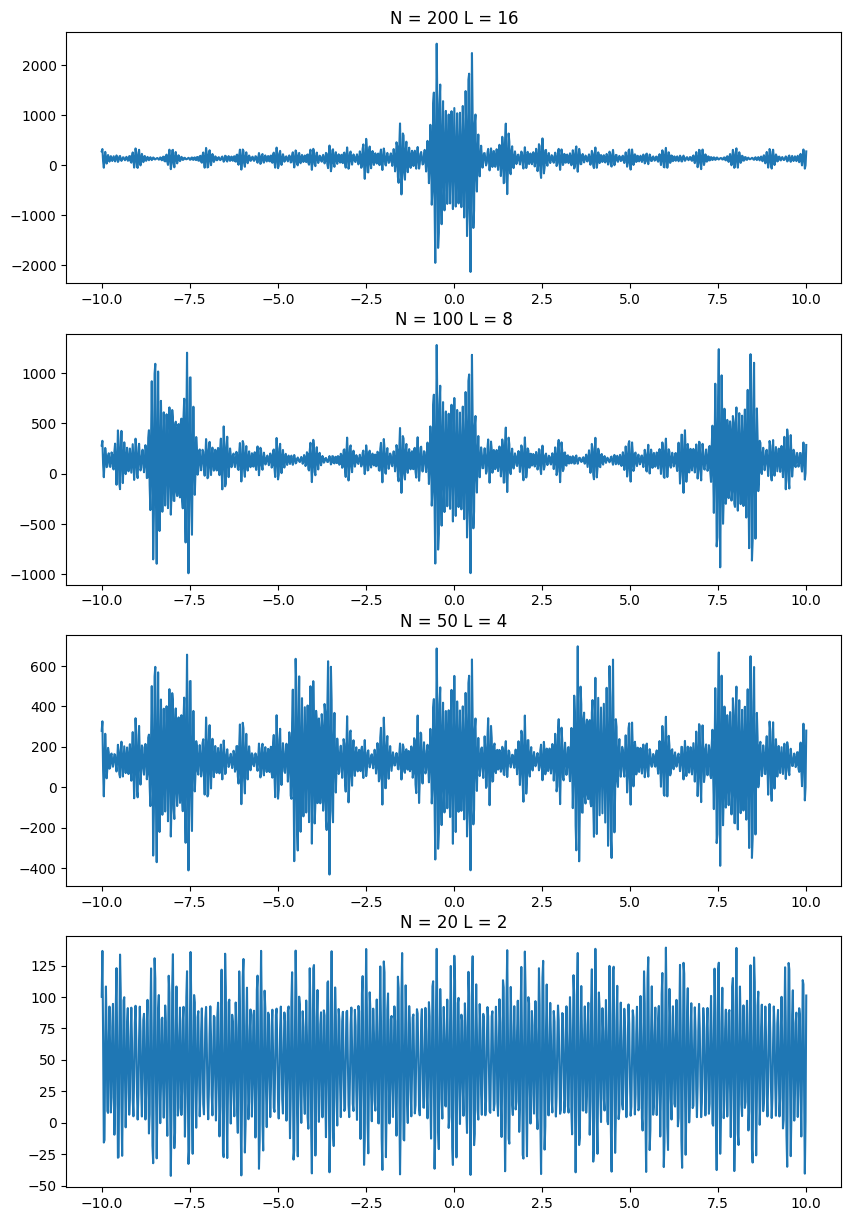

In [ ]:
# make a function that calculates the value of the fourier transform at the point n/L
def F(u):
  t = np.linspace(-10,10,1000)
  morlet = np.exp((-t**2)/2)*np.cos(5*t)
  Fmorlet = fft(morlet)
  return Fmorlet[u]


# This function calculates the periodic function f_p(x)
def fp(L,N):
  sum1 = 0
  sum2 = 0
  t = np.linspace(-10,10,1000)
  xs = []
  for x in range(len(t)):
    for n in range(int(-N),int(N)+1):
      u = round(n/L)
      sum1 += np.real(F(u)) * np.cos(2*np.pi*n*t[x]*(1/L))
      sum2 += np.imag(F(u)) * np.sin(2*np.pi*n*t[x]*(1/L))
    value = (1/L) + 2*sum1 - 2*sum2
    xs.append(value)
  return xs

# Testing how chaning the range of N affects the plots
fig, ax1 = plt.subplots(4,1,figsize = (10,15))
N = 200
L = 2
f_p = fp(L,N)
ax1[0].plot(t,f_p)
ax1[0].set_title('N = ' + str(N) +  ' L = ' + str(L))

N = 100
L = 2
f_p = fp(L,N)
ax1[1].plot(t,f_p)
ax1[1].set_title('N = ' + str(N) +  ' L = ' + str(L))


N = 50
L = 2
f_p = fp(L,N)
ax1[2].plot(t,f_p)
ax1[2].set_title('N = ' + str(N) +  ' L = ' + str(L))

N = 20
L = 2
f_p = fp(L,N)
ax1[3].plot(t,f_p)
ax1[3].set_title('N = ' + str(N) +  ' L = ' + str(L))
plt.show()


# Testing how changing the period affects the plots
fig, ax2 = plt.subplots(4,1,figsize = (10,15))
N = 200
L = 16
f_p = fp(L,N)
ax2[0].plot(t,f_p)
ax2[0].set_title('N = ' + str(N) +  ' L = ' + str(L))

N = 100
L = 8
f_p = fp(L,N)
ax2[1].plot(t,f_p)
ax2[1].set_title('N = ' + str(N) +  ' L = ' + str(L))


N = 50
L = 4
f_p = fp(L,N)
ax2[2].plot(t,f_p)
ax2[2].set_title('N = ' + str(N) +  ' L = ' + str(L))

N = 20
L = 2
f_p = fp(L,N)
ax2[3].plot(t,f_p)
ax2[3].set_title('N = ' + str(N) +  ' L = ' + str(L))
plt.show()



As N increases the spikes in the truncated fourier series increase. The amplitude of the spikes also increase. Though when N gets sufficiently large, the spikes become more precise as compared to when N is smaller. The interval between the spikes is consistent with the period L. As L increases the spacing between the spikes also increases. As N and L increase the periodic function ,fp, is able to approximate the original function, in this case a morlet wavelet.

1 c) Recall the sampling theorem for bandlimited functions from the first lecture. What is the bandwidth
of the truncated Fourier series that uses n ∈ [−N, N]?

The bandwidth is 100 for this function.



1 D) Based on your previous answer, how many data points must be used so that the series output plot for
a given N does not contain aliasing? Using graphics, show what happens when you use fewer than
this number of data points to plot f. Comment on the differences from the corresponding plot for part
1(b) that used the same N.

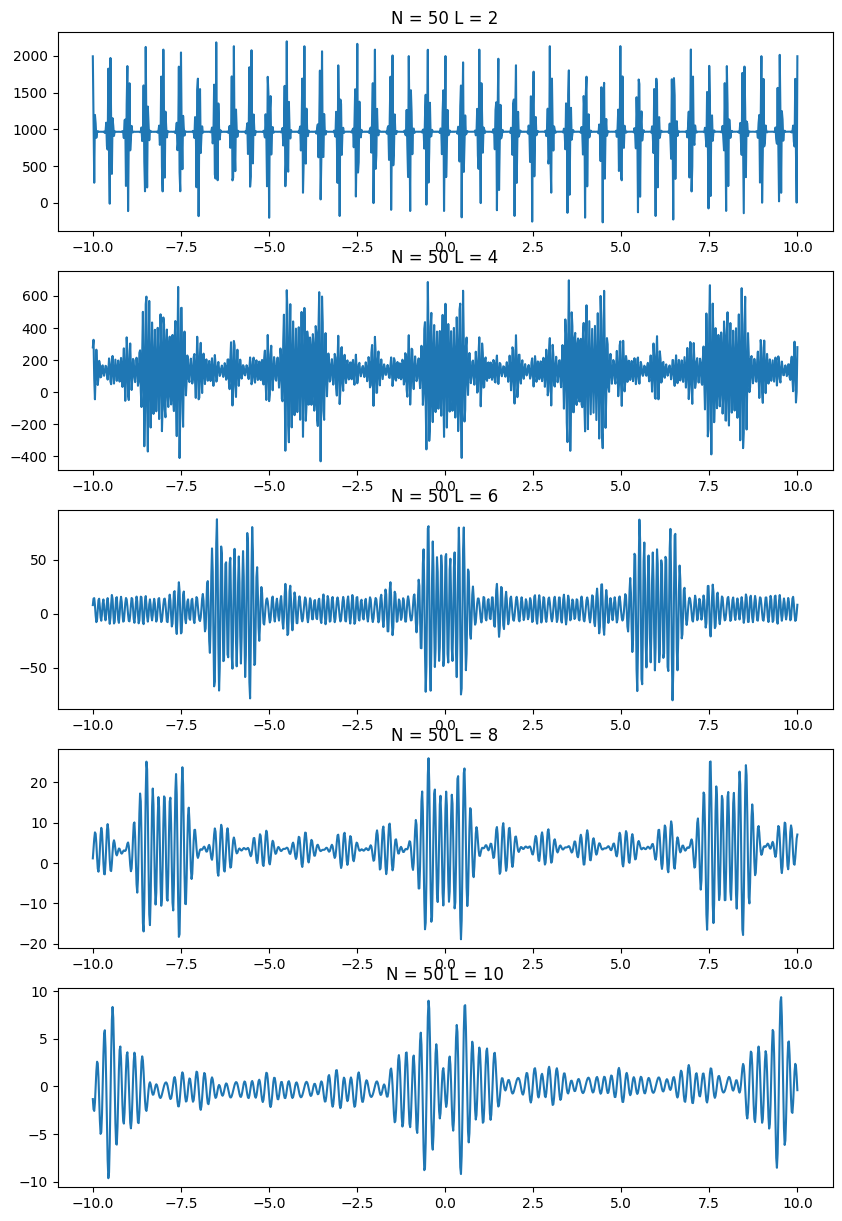

In [ ]:
fig, ax3 = plt.subplots(5,1,figsize = (10,15))
N = 50
L = 2
f_p = fp(L,N)
ax3[0].plot(t,f_p)
ax3[0].set_title('N = ' + str(N) +  ' L = ' + str(L))

L = 4
f_p = fp(L,N)
ax3[1].plot(t,f_p)
ax3[1].set_title('N = ' + str(N) +  ' L = ' + str(L))

L = 6
f_p = fp(L,N)
ax3[2].plot(t,f_p)
ax3[2].set_title('N = ' + str(N) +  ' L = ' + str(L))

L = 8
f_p = fp(L,N)
ax3[3].plot(t,f_p)
ax3[3].set_title('N = ' + str(N) +  ' L = ' + str(L))

L = 10
f_p = fp(L,N)
ax3[4].plot(t,f_p)
ax3[4].set_title('N = ' + str(N) +  ' L = ' + str(L))
plt.show()


From my plots N must be at least 50 for it to be possible to see the shape of the original wavelet and prevent aliasing. Also a period of 6 or more is necessary to seperate out the wavelets so that the original function can be clearly observed. With N below 50 the plot looks like noise and its not possible to see anything useful in the plot. If L increases too much without increasing N then the signal is lost. Therefore to recreate the signal the best its necessary to increase N and L proportionally.  

2 A)

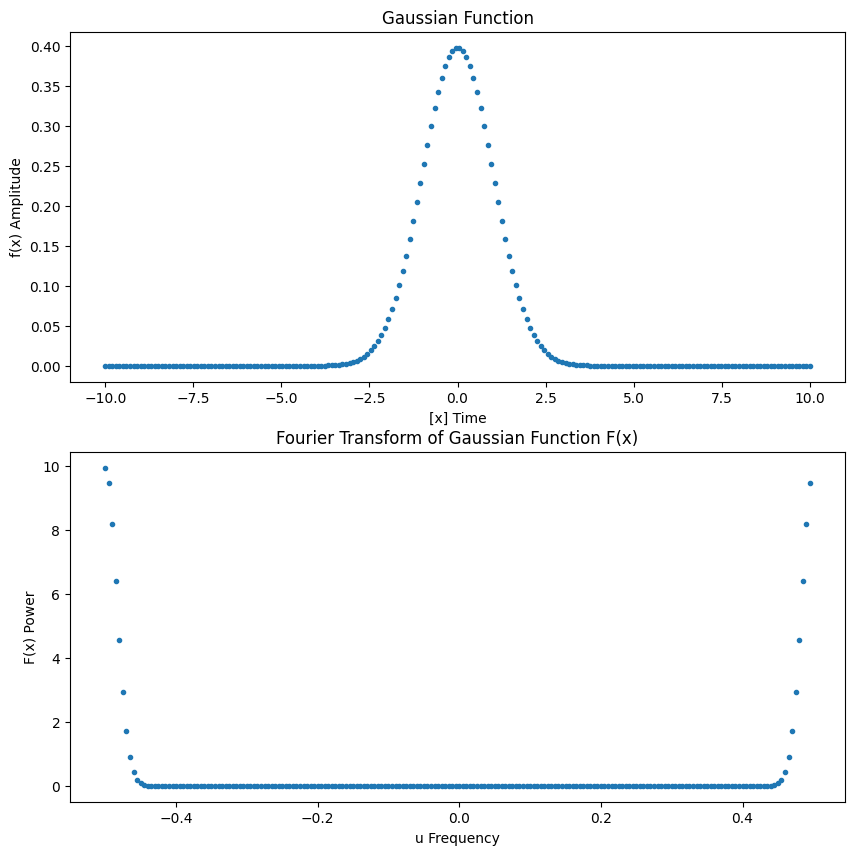



Nyquist frequency is 0.0025


In [ ]:
def gaussian(x, mu, sig):
    return (
        (1.0 / (np.sqrt(2.0 * np.pi) * sig)) * (np.exp(-np.power((x - mu) / sig, 2.0) / 2))
    )

x = np.linspace(-10, 10, 200)
mu = 0
sig = 1
fx2 = gaussian(x, mu, sig)

sample_int = 1/len(x)
Ny = .5*sample_int

Fx2 = fft(fx2)
u = fftshift(fftfreq(len(x)))

fig, axs = plt.subplots(2,1,figsize =(10, 10))
axs[0].plot(x, fx2, '.')
axs[0].set_title('Gaussian Function')
axs[0].set_xlabel('[x] Time')
axs[0].set_ylabel('f(x) Amplitude')

axs[1].plot(u, np.abs(np.real(Fx2)), '.')
axs[1].set_title('Fourier Transform of Gaussian Function F(x)')
axs[1].set_xlabel('u Frequency')
axs[1].set_ylabel('F(x) Power')
plt.show()

print('\n\nNyquist frequency is ' + str(Ny))

2 B) Use the discrete form of the convolution theorem to compute the convolution of your function with
itself when no zero-padding is used. Compare your result to what is obtained by convolving the
continuous function and then sampling (the “truth”).

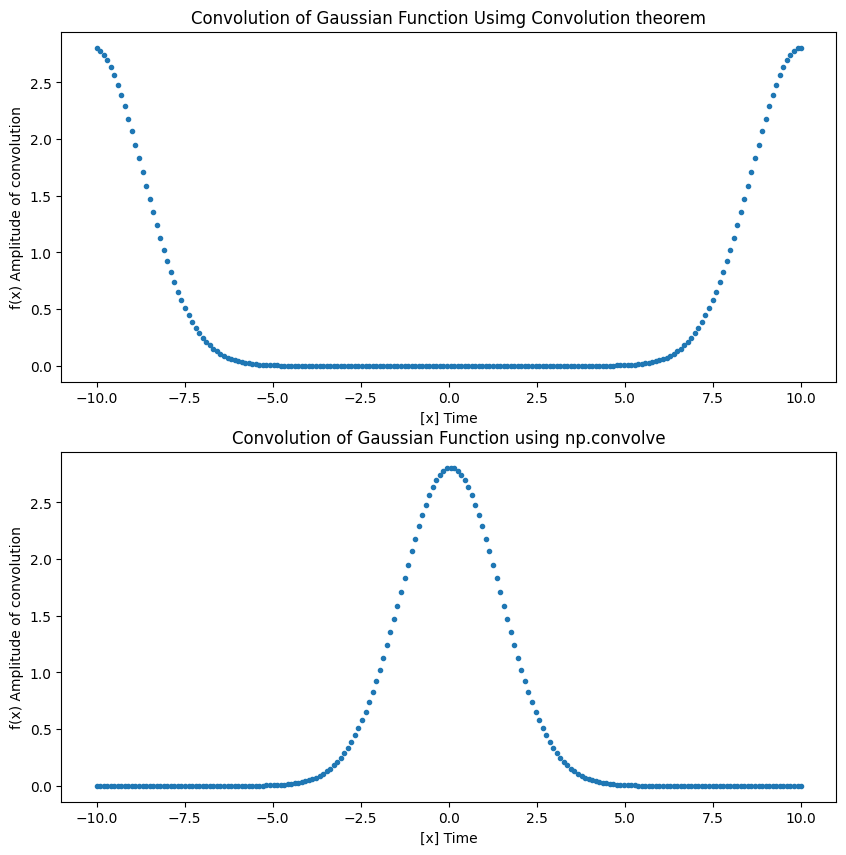

In [ ]:
#Mutliply Fx with itself then use ifft to convert back to time domain
rx = np.real(ifft(Fx2 * Fx2))

fig, axs = plt.subplots(2,1,figsize = (10,10))
axs[0].plot(x, rx, '.')
axs[0].set_title('Convolution of Gaussian Function Usimg Convolution theorem')
axs[0].set_xlabel('[x] Time')
axs[0].set_ylabel('f(x) Amplitude of convolution')


# Convolve fx with itself using the np.convolve module
conv = np.convolve(fx2,fx2,mode = 'same')

axs[1].plot(x, conv, '.')
axs[1].set_title('Convolution of Gaussian Function using np.convolve')
axs[1].set_xlabel('[x] Time')
axs[1].set_ylabel('f(x) Amplitude of convolution')
plt.show()

2 C) Perform the numerical convolution using zero-padding. Compare your result to the truth.




399


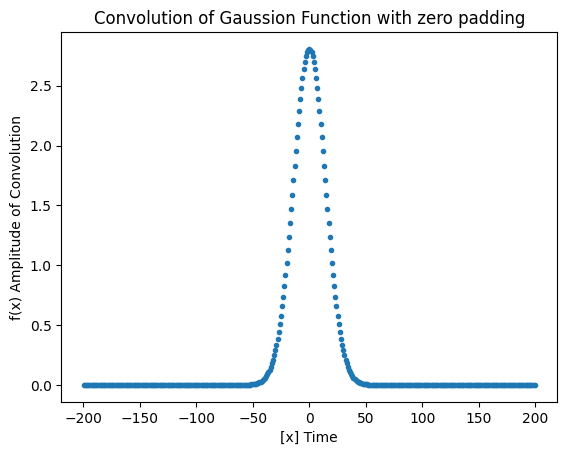

In [ ]:
# convovle with zero padding
yZero = np.convolve(fx2, fx2, mode = 'full')

pad = len(yZero)
print(pad)
x_pad = np.linspace(-pad/2, pad/2, pad)
plt.figure()
plt.plot(x_pad, yZero, '.')
plt.title('Convolution of Gaussion Function with zero padding')
plt.xlabel('[x] Time')
plt.ylabel('f(x) Amplitude of Convolution')
plt.show()

The results are very similar to the convolution with no padding. The overall shapes of both bell curves are identical. They both have the same magnitude. The biggest difference is the length of each of the 'arms' in the graphs. By padding the convolution with zeroes it extends the graph by the length of each array to be convolved minus 1. (M+N-1)